<a href="https://colab.research.google.com/github/Noemiebag/2024_Intro_Python/blob/main/No%C3%A9mieBagnoudW4_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Marathon Data Analysis

(Reference: [Python Data Sciences Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/))

Here we'll use `Seaborn` to visualize and understand finishing results from a marathon.

We will start by downloading the data from the Web and loading it into Pandas:

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd

We use the a linux command line tool `curl` to load data from an url address.

We add an exclamation mark `!` to use command line tools directly in Google Colab.

Check this [website](https://phoenixnap.com/kb/curl-command) if you are interested in how to use `curl`.

In [72]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0  2489k      0 --:--:-- --:--:-- --:--:-- 2497k


In [73]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


This looks much better. However time information is quite tricky to visualize. To make our life easier, we will use the `convert_time` function to change the time stamps information to time values in seconds.


## Q1: Add two new columns to store the `split` and `final` in seconds, and name these columns `split_sec` and `final_sec`

Conversion can be made using this equation: `data['split'].astype(int)/1e9`

Hint: [Here](https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/) you can find some ways to add new columns to existing `pandas` dataframe.

In [74]:
data['split_sec'] = data['split'].astype(int)/1e9
data['final_sec'] = data['final'].astype(int)/1e9

# Print the first few rows to ensure we really appended the table with the new columns.
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


Now that we have processed our dataset, can you help us analyze the marathon dataset?



## Q2: Use `jointplot()` to visualize two columns (x axis will be `split_sec`, y axis will be `final_sec`)

We will use `hex` for the 2D histogram part of the figure.

You should see something like this.

Hint: Refer to the `jointplot()` [documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html) for details.

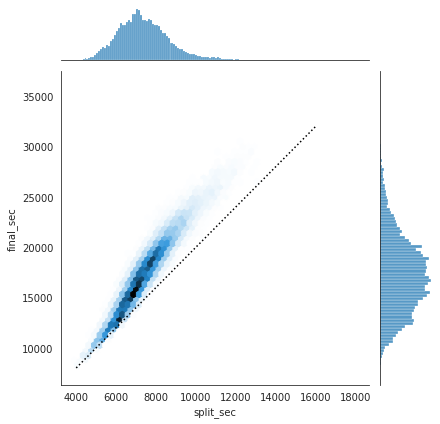

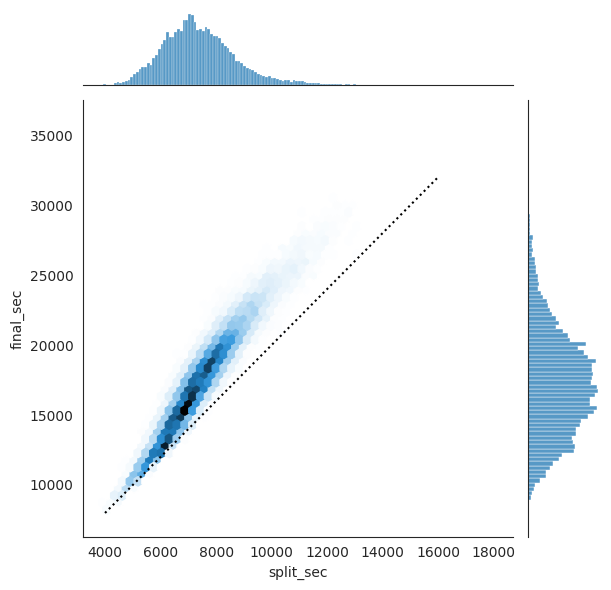

In [75]:
with sns.axes_style('white'):
    g = sns.jointplot(x='split_sec',y='final_sec',data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon.
If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

## Q3: Add a new column `split_frac` to the table

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:\
$SF = 1-2*\frac{split sec}{final sec}$

Hint: This is similar to what you just did for **Q1**.

In [76]:
data['split_frac'] = 1-2*((data['split_sec'])/(data['final_sec']))

# Print the first few rows to ensure we really appended the table with the new column.
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


## Q4: Print the number of people who had a `split_frac` that was less than zero

You should see a single number of 251 being printed out.

In [77]:
d2 = (data['split_frac']<0).sum()
print(d2)

251


Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

## Q5: See if there is any correlation between split fraction and other variables. Use ``pairgrid()`` to visualize all these correlations

We will use `sns.PairGrid()` to visualize the correlations. Let's try to visualize `age`, `split_sec`, `final_sec`, and `split_frac` in the table.

We will plot the **2D scatter plots** for male and female separately with the `gender` column. Check out `hue` option in the `PairGrid()` tutorial on how to do that.

Use the palette `RdBu_r` for a visually pleasing plot~

We would also like to add a legend as well.

Hints: Check [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) in the seaborn website to see how we use scatter plots for our figures.

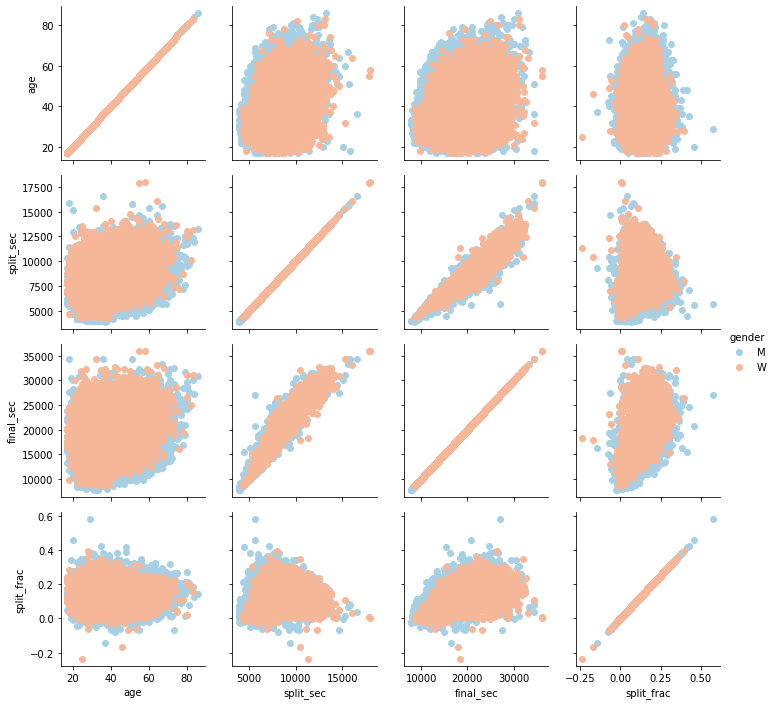

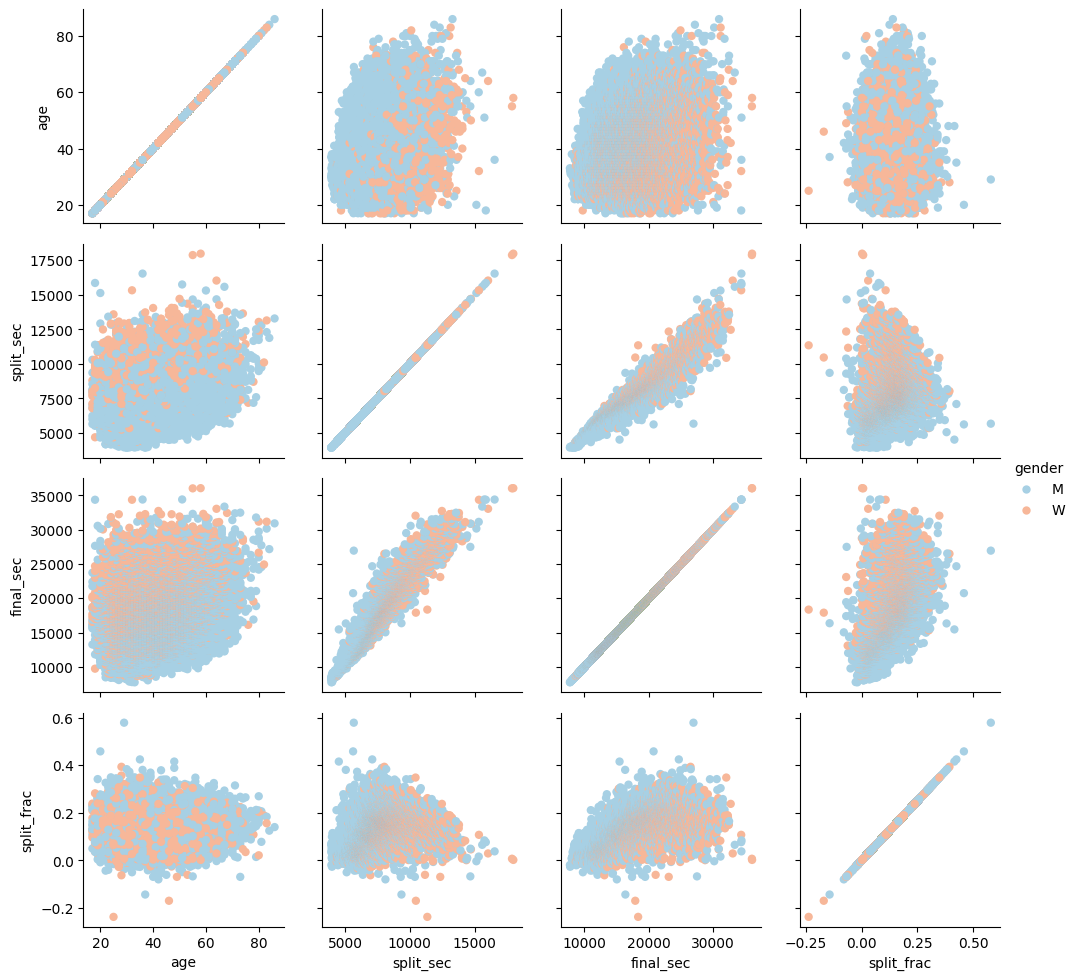

In [78]:
g = sns.PairGrid(data, vars= ('age','split_sec','final_sec','split_frac'), hue='gender', hue_order=('M','W'),palette='RdBu_r')
g.map(sns.scatterplot, edgecolor='None')
# Add legend here.
g.add_legend()

## Q6: Separate the runner stats by gender and explore the differences in split fraction distributions with KDE plots

Hint: You can use `kdeplot()` function in seaborn for this question. Check the seaborn [documentation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot) for details.

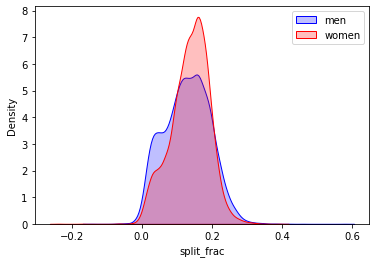

       age gender           split           final  split_sec  final_sec  \
28      34      W 0 days 01:12:35 0 days 02:24:13     4355.0     8653.0   
30      39      W 0 days 01:13:13 0 days 02:25:37     4393.0     8737.0   
32      29      W 0 days 01:13:09 0 days 02:25:50     4389.0     8750.0   
40      36      W 0 days 01:12:57 0 days 02:28:13     4377.0     8893.0   
41      27      W 0 days 01:13:07 0 days 02:28:27     4387.0     8907.0   
...    ...    ...             ...             ...        ...        ...   
37241   42      W 0 days 03:27:53 0 days 09:05:44    12473.0    32744.0   
37242   64      W 0 days 04:27:19 0 days 09:10:58    16039.0    33058.0   
37244   32      W 0 days 04:15:33 0 days 09:32:56    15333.0    34376.0   
37248   55      W 0 days 04:58:06 0 days 10:00:40    17886.0    36040.0   
37249   58      W 0 days 04:59:49 0 days 10:01:08    17989.0    36068.0   

       split_frac  
28      -0.006587  
30      -0.005608  
32      -0.003200  
40       0.015630  

<ipython-input-79-f98750d0e9be>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_men['split_frac'], label='men', shade=True,color='blue')
<ipython-input-79-f98750d0e9be>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_women['split_frac'], label='women', shade=True,color='red')


Text(0.5, 0, 'split_frac')

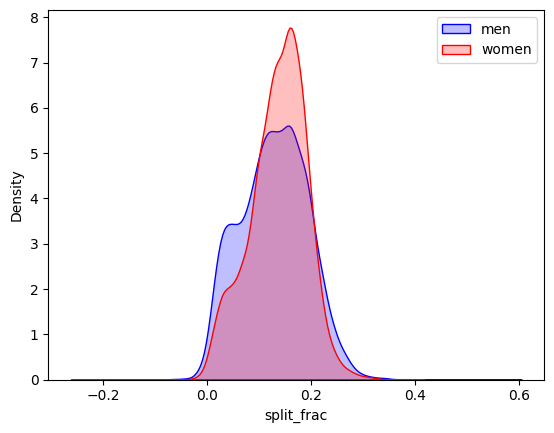

In [79]:
df_men = data[data['gender']=='M']
df_women = data[data['gender']=='W']
print(df_women)
# Visualize male split_frac here.
sns.kdeplot(df_men['split_frac'], label='men', shade=True,color='blue')
# Visualize female split_frac here.
sns.kdeplot(df_women['split_frac'], label='women', shade=True,color='red')
plt.legend()
plt.xlabel('split_frac')

## (BONUS) Q7: Compare the gender differences in split fraction again with violinplot(), but now examine these differences *as a function of age*

Hint:

1.   Create a new column in the array that specifies the decade of age that each person is in. (Equation: 10 * (age // 10))
2.   Add new column to Pandas dataframe (data), you could name it "age_decade"
3.   Visualize your data with this: `sns.violinplot("age_decade", "split_frac",...)`
4.   Try to explore different ways to produce the plot below, we used [violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot), but it may be more convenient to use [catplot()](https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=catplot#seaborn.catplot).

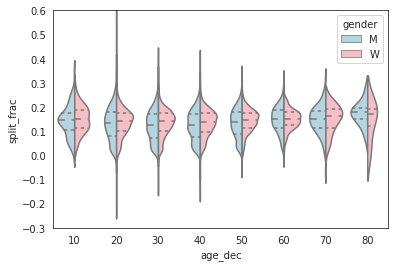

       age gender           split           final  split_sec  final_sec  \
0       33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0   
1       32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0   
2       31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0   
3       38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0   
4       31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0   
...    ...    ...             ...             ...        ...        ...   
37245   18      M 0 days 04:24:24 0 days 09:32:57    15864.0    34377.0   
37246   36      M 0 days 04:35:43 0 days 09:33:28    16543.0    34408.0   
37247   51      M 0 days 04:22:35 0 days 09:33:40    15755.0    34420.0   
37248   55      W 0 days 04:58:06 0 days 10:00:40    17886.0    36040.0   
37249   58      W 0 days 04:59:49 0 days 10:01:08    17989.0    36068.0   

       split_frac  age_decade  
0       -0.018756          30  
1       -0.026262          30  
2  

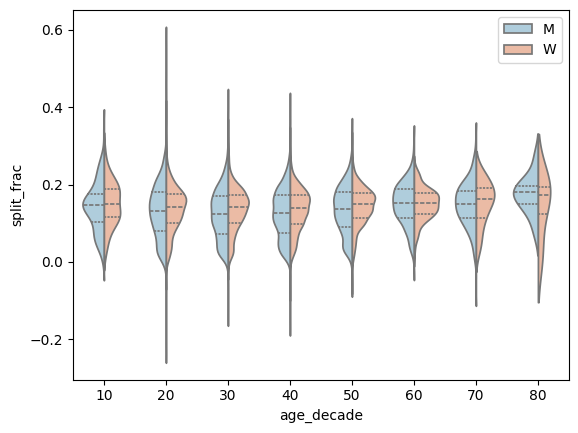

In [80]:
# Recreate this figure here
data['age_decade']=10*(data['age']//10)
print(data)
sns.violinplot(data, x="age_decade",y="split_frac", hue="gender", hue_order=('M','W'), split=True, inner="quart",palette='RdBu_r')
plt.legend()